In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [159]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import shapely
import pandas as pd
import shapely.plotting
from koyo.utilities import find_nearest_index_batch, find_nearest_index
from koyo.color import get_random_hex_color
from pathlib import Path

from image2image_reg.workflows import ValisReg
from image2image_io.readers import get_simple_reader
from image2image_reg.valis.utilities import (
    _convert_geojson_to_df, _transform_points_as_image, _convert_df_to_geojson, _filter_transform_coordinate_image,
    _prepare_transform_coordinate_image, _cleanup_transform_coordinate_image, _transform_coordinate_image, _cleanup_transform_coordinate_image
)

In [3]:
path = "/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B010-reg004/pre2ims.valis"
valis = ValisReg.from_path(path)

In [4]:
reg = valis.registrar

SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.


JVM has been initialized. Be sure to call registration.kill_jvm() or slide_io.kill_jvm() at the end of your script.


In [13]:
modality = valis.attachment_points["statistics_analysis"]["attach_to"]
modality = valis.get_modality(modality)
slide = reg.get_slide(str(modality.path))
width, height = slide.slide_dimensions_wh[0]
slide

<Slide, name = precodex_to_he_registered>, width=13049, height=9386, channels=4, levels=5, RGB=False, dtype=uint8>

In [ ]:
reader = get_simple_reader(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/pre2ims.wsireg/Images/statistics_analysis_to_precodex_registered.csv")

In [228]:
path = r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B010-reg004/pre2ims.wsireg/Images/neighborhood_mature_epithelial_to_precodex_registered.geojson"
# path = r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B010-reg004/pre2ims.wsireg/Images/statistics_analysis_to_precodex_registered.csv"
# path = r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg001/pre2ims.valis/Images/tissue_submucosa_to_precodex_registered.geojson"
reader = get_simple_reader(path)

In [208]:
for path in Path(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg001/pre2ims.valis/Images").glob("*.geojson"):
    reader = get_simple_reader(path)

    for shape in reader.geojson_data:
        shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
        shape_buf = shape.buffer(0)

In [206]:
for shape in reader.geojson_data:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shape_buf = shape.buffer(0)

In [231]:
import shapely.validation
import shapely.geometry


ps = []
for p in reader.to_shapely():
    pp = shapely.validation.make_valid(p)
    # shapely.geometry.mapping(pp)

POLYGON ((3839.7978515625 1940.7947998046875, 3859.379150390625 1959.9888916015625, 3867.353759765625 1967.9832763671875, 3867.913330078125 1978.2061767578125, 3930.605712890625 1978.50537109375, 3898.607421875 2079.299072265625, 3774.4541015625 2008.0146484375, 3744.926025390625 1755.31396484375, 3839.7978515625 1940.7947998046875))
POLYGON ((4251.18408203125 1910.2021484375, 4285.58203125 1925.7244873046875, 4229.5537109375 1923.9693603515625, 4249.90087890625 1899.1810302734375, 4251.18408203125 1910.2021484375))


In [194]:
sh = shapely.Polygon(reader.geojson_data[0]["geometry"]["coordinates"][0])

In [247]:
df, props = _convert_geojson_to_df(reader.geojson_data, True, 1)
df

,x,y,unique_index,inner,outer,type
0,3839.797899,1940.794773,1,0,0,pg
1,3859.379212,1959.988889,1,0,0,pg
2,3867.353743,1967.983248,1,0,0,pg
3,3867.913266,1978.206223,1,0,0,pg
4,3930.605612,1978.505322,1,0,0,pg
5,3898.607327,2079.298962,1,0,0,pg
6,3774.454063,2008.014656,1,0,0,pg
7,3744.925939,1755.313973,1,0,0,pg
8,4251.184256,1910.202188,2,0,0,pg
9,4285.581902,1925.724476,2,0,0,pg


In [253]:
_convert_df_to_geojson(df, df.x.values, df.y.values, True, 1., n_to_prop=props)

[{'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': (((3839.797899361087, 1940.7947727268458),
     (3859.3792116044056, 1959.9888894794694),
     (3867.3537426955936, 1967.9832484172248),
     (3867.913265771762, 1978.206222508416),
     (3930.6056117738162, 1978.5053224530943),
     (3898.607326991451, 2079.2989615207193),
     (3774.4540632038866, 2008.0146560232345),
     (3744.925939300336, 1755.3139728667998),
     (3839.797899361087, 1940.7947727268458)),)},
  'properties': {'sample': 10,
   'region': 1040,
   'cluster': 0,
   'area': 34344.5,
   'perimeter': 1069.2554371755823,
   'aspect_ratio': 0.628361858190709,
   'classification': {'name': 'unnamed'}}},
 {'type': 'Feature',
  'geometry': {'type': 'Polygon',
   'coordinates': (((4251.184255791128, 1910.2021884352484),
     (4285.581901528747, 1925.724476054425),
     (4229.553484965195, 1923.969403293051),
     (4249.901019209919, 1899.1810543339502),
     (4251.184255791128, 1910.2021884352484)),)},
  

In [170]:
for k, dfff in df.groupby("unique_index"):
    print(k)

1
2
3
4
5
6
7
8


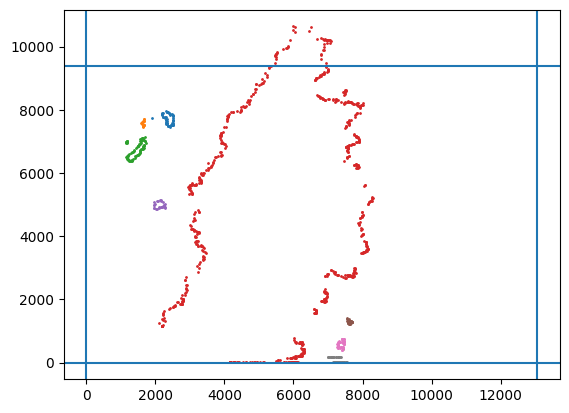

In [156]:
plt.figure()
for _, dfff in df.groupby("unique_index"):
    plt.scatter(dfff.x, dfff.y, s=1)
plt.axvline(0)
plt.axhline(0)
plt.axvline(width)
plt.axhline(height)

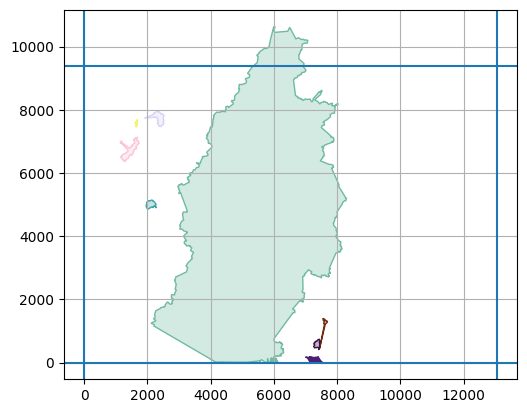

In [157]:
plt.figure()
for shape in reader.geojson_data:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shapely.plotting.plot_polygon(shape, add_points=False, color=get_random_hex_color())
plt.axvline(0)
plt.axhline(0)
plt.axvline(width)
plt.axhline(height)

In [35]:
image_of_index, index_of_coords, _, _, dff = _prepare_transform_coordinate_image(
    slide, df.x.values, df.y.values, df
)
geo = _convert_df_to_geojson(dff, dff.x.values, dff.y.values, True, 1.)

In [42]:
xx, yy, dfff = _cleanup_transform_coordinate_image(slide, image_of_index.flatten(), index_of_coords, dff, trim=False)

In [45]:
xx - dfff.x
yy - dfff.y

0     0.207509
1    -0.068612
2    -0.031624
3    -0.230332
4     0.490011
5    -0.374315
6    -0.070171
7    -0.342938
8    -0.244702
9     0.223497
10    0.053535
11   -0.251054
Name: y, dtype: float64

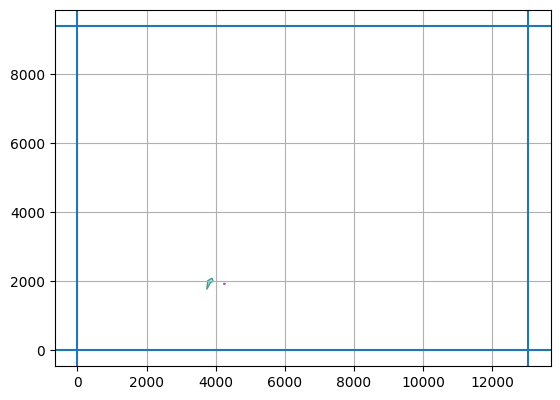

In [34]:
for shape in geo:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shapely.plotting.plot_polygon(shape, add_points=False, color=get_random_hex_color())
plt.axvline(0)
plt.axhline(0)
plt.axvline(width)
plt.axhline(height)

In [26]:
new_x, new_y, dff = _transform_points_as_image(slide, df.x.values, df.y.values, df, trim=False)
geo = _convert_df_to_geojson(dff, new_x, new_y, True, 1.)

/Users/lgmigas/Documents/GitHub/valis/valis/valtils.py:24: UserWarning: scaling transformation for image with different shape. However, without knowing all of other image's shapes, the scaling may not be the same for all images, and so may not overlap.
  warnings.warn(warning_msg, warning_type)


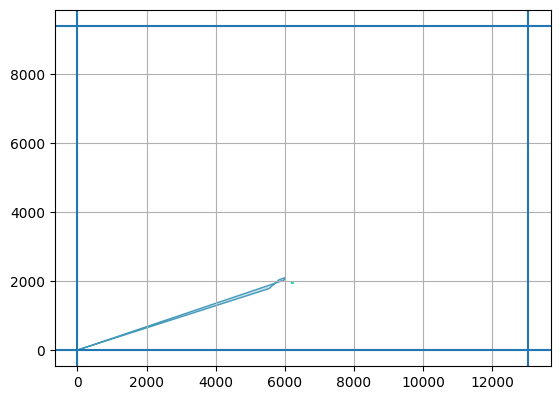

In [27]:
for shape in geo:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shapely.plotting.plot_polygon(shape, add_points=False, color=get_random_hex_color())
plt.axvline(0)
plt.axhline(0)
plt.axvline(width)
plt.axhline(height)

In [19]:
new_x, new_y, dff = _transform_points_as_image(slide, df.x.values, df.y.values, df, trim=False)
new_x, new_y, dff = _filter_transform_coordinate_image(slide, new_x, new_y, dff, 0.15)
geo = _convert_df_to_geojson(dff, new_x, new_y, True, 1.)

for shape in geo:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shapely.plotting.plot_polygon(shape, add_points=False, color=get_random_hex_color())
plt.axvline(0)
plt.axhline(0)
plt.axvline(width)
plt.axhline(height)

/Users/lgmigas/Documents/GitHub/valis/valis/valtils.py:24: UserWarning: scaling transformation for image with different shape. However, without knowing all of other image's shapes, the scaling may not be the same for all images, and so may not overlap.
  warnings.warn(warning_msg, warning_type)


ValueError: A linearring requires at least 4 coordinates.

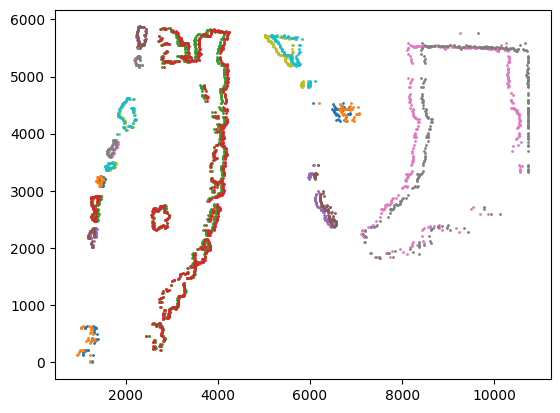

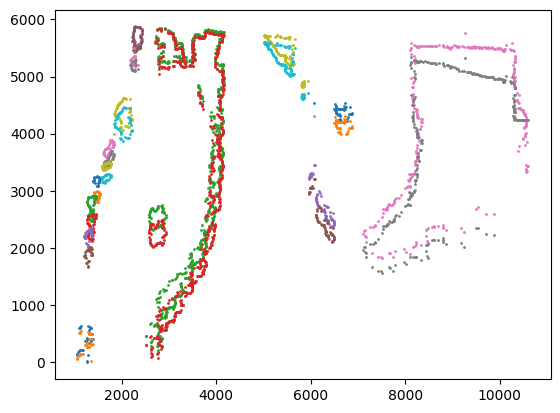

In [202]:
plt.figure()
for _, dfff in dff.groupby("unique_index"):
    plt.scatter(dfff.x, dfff.y, s=1)
    plt.scatter(new_x[dfff.index], dfff.y, s=1)

plt.figure()
for _, dfff in dff.groupby("unique_index"):
    plt.scatter(dfff.x, dfff.y, s=1)
    plt.scatter(dfff.x, new_y[dfff.index], s=1)

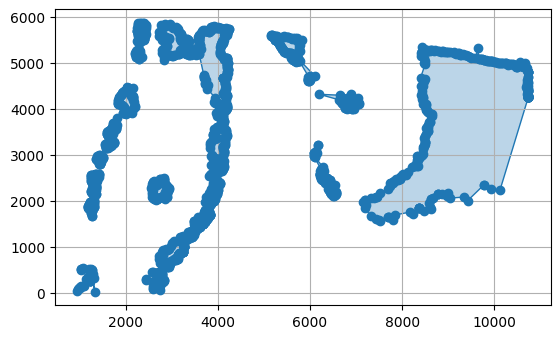

In [204]:
for shape in geo:
    shape = shapely.Polygon(shape["geometry"]["coordinates"][0])
    shapely.plotting.plot_polygon(shape)

In [86]:
new_x, new_y, _ = _transform_points_as_image(
    slide,
    reader.x,
    reader.y,
    reader.df,
)

/Users/lgmigas/Documents/GitHub/valis/valis/valtils.py:24: UserWarning: scaling transformation for image with different shape. However, without knowing all of other image's shapes, the scaling may not be the same for all images, and so may not overlap.
  warnings.warn(warning_msg, warning_type)


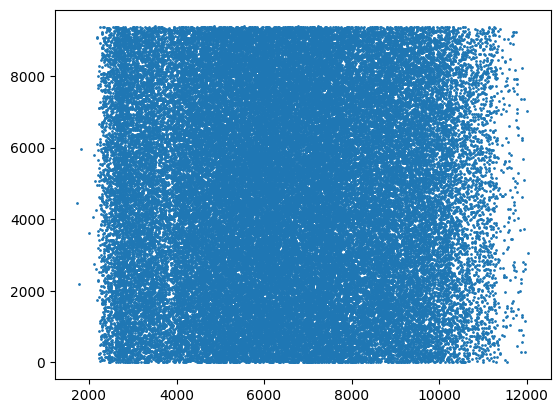

In [87]:
plt.scatter(new_x, new_y, s=1)

In [150]:
image_of_index, index_of_coords, x, y, df = _prepare_transform_coordinate_image(slide, reader.x, reader.y, reader.df)

In [151]:
image_of_index_, image_of_index_f = _transform_coordinate_image(slide, image_of_index)

/Users/lgmigas/Documents/GitHub/valis/valis/valtils.py:24: UserWarning: scaling transformation for image with different shape. However, without knowing all of other image's shapes, the scaling may not be the same for all images, and so may not overlap.
  warnings.warn(warning_msg, warning_type)


In [140]:
df

,CD25,MUC1,CD57,Vimentin,CD11c,CD7,CD21,CD34,HLADR,CD3,...,int_region,macro_region,donor age,donor sex,donor race,BMI,History of diabetes,History of cancer,History of hypertension,History gastrointestinal disease
0,1.212099,4.421165,2.626239,0.773798,0.318817,0.009824,-0.027339,0.906211,-0.015756,0.586958,...,Descending,Colon,37,male,White,24.6,0,0,0,0
1,-0.150129,1.262431,0.304076,-0.504255,-0.252107,-0.357409,-0.027339,-0.308993,-0.015756,-0.417574,...,Descending,Colon,37,male,White,24.6,0,0,0,0
2,-0.294128,-0.076848,0.103998,-0.453097,-0.264614,-0.353778,-0.027339,-0.309997,-0.015756,-0.373344,...,Descending,Colon,37,male,White,24.6,0,0,0,0
3,-0.200201,2.847639,1.526708,-0.134241,-0.026013,-0.318323,-0.027339,-0.321797,-0.015756,-0.390166,...,Descending,Colon,37,male,White,24.6,0,0,0,0
4,-0.202474,1.326522,0.188093,-0.384076,-0.248995,-0.307780,-0.027339,-0.131700,-0.015756,-0.268794,...,Descending,Colon,37,male,White,24.6,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76664,-0.031529,-0.335900,-0.419288,7.258510,-0.290305,-0.357409,-0.027339,-0.518987,-0.015756,-0.428298,...,Descending,Colon,37,male,White,24.6,0,0,0,0
76665,-0.409163,-0.335900,-0.441159,8.730920,-0.233698,-0.356558,-0.027339,-0.613204,-0.015756,-0.428298,...,Descending,Colon,37,male,White,24.6,0,0,0,0
76666,-0.245201,-0.335204,0.446020,8.917194,-0.229983,-0.297188,-0.027339,-0.496108,-0.015756,-0.408099,...,Descending,Colon,37,male,White,24.6,0,0,0,0
76667,-0.256056,-0.285615,-0.134615,5.864537,-0.254552,-0.257783,-0.027339,-0.581241,-0.015756,-0.426557,...,Descending,Colon,37,male,White,24.6,0,0,0,0


In [148]:
yy, xx = np.nonzero(image_of_index_)
values = image_of_index_[yy, xx]
sort = np.argsort(values)
values = values[sort]
xx = xx[sort]
yy = yy[sort]
indices = find_nearest_index_batch(values, index_of_coords)
new_x = xx[indices]
new_y = yy[indices]

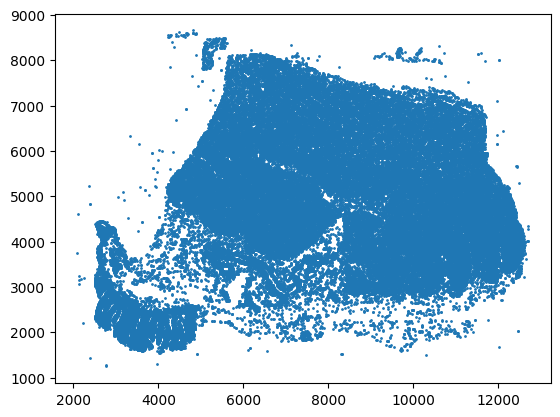

In [149]:
plt.scatter(new_x, new_y, s=1)

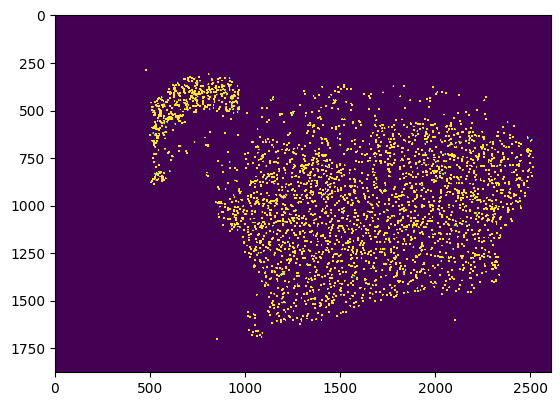

In [101]:
plt.imshow(image_of_index_[::5, ::5], vmax=1)

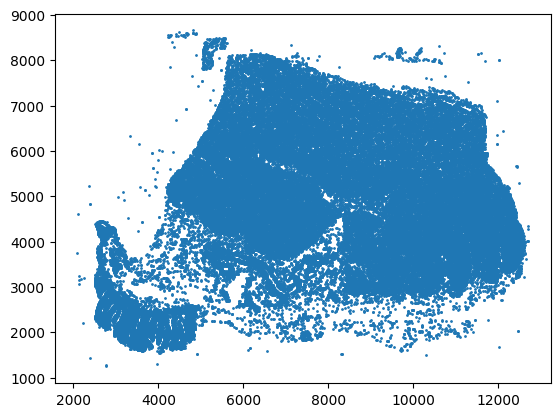

In [153]:
nx, ny, ndf = _cleanup_transform_coordinate_image(slide, image_of_index_, index_of_coords, df, trim=False)
plt.scatter(nx, ny, s=1)

array([ 3840.01938738,  3859.01660211,  3867.08411479,  3868.08908965,
        3931.01371072,  3898.90569325,  3773.94097695,  3745.02999288,
        4251.06302492,  4285.97849363,  4229.949442  ,  4249.94968814])

In [109]:
# get coordinates of the image
x, y = reader.x, reader.y
x = np.round(x).astype(int)
y = np.round(y).astype(int)

# get slide shape
shape = slide.slide_dimensions_wh[0]
width, height = shape

df = reader.df
index_of_coords = np.arange(1, len(x) + 1)

# crop so that only the coordinates within the slide are kept
indices = np.where((x >= 0) & (x < width) & (y >= 0) & (y < height))
index_of_coords = index_of_coords[indices]
x = x[indices]
y = y[indices]
df = reader.df.iloc[indices]

# let's create a image  of the same shape as the source image
image_of_index = np.zeros(slide.slide_shape_rc)
image_of_index[y, x] = index_of_coords
image_of_x = np.zeros(slide.slide_shape_rc)
image_of_x[y, x] = x
image_of_y = np.zeros(slide.slide_shape_rc)
image_of_y[y, x] = y

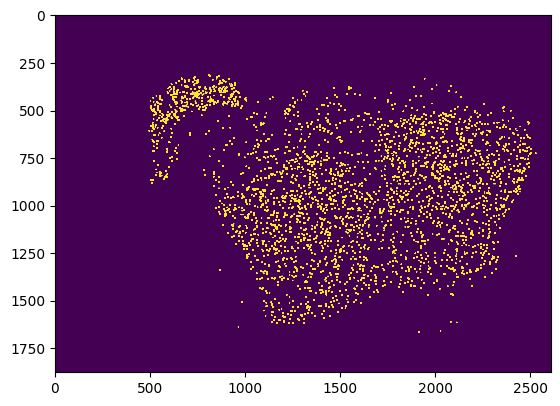

In [110]:
plt.imshow(image_of_index[::5, ::5], vmax=1)

In [111]:
# Transform the images to the reference space
image_of_index_ = slide.warp_img(image_of_index, crop="reference", interp_method="nearest")
image_of_index_f = image_of_index_.flatten()

# image_of_x_ = slide.warp_img(image_of_x, crop="reference", interp_method="nearest")
# image_of_x_ = image_of_x_.flatten()

# image_of_y_ = slide.warp_img(image_of_y, crop="reference", interp_method="nearest")
# image_of_y_ = image_of_y_.flatten()

/Users/lgmigas/Documents/GitHub/valis/valis/valtils.py:24: UserWarning: scaling transformation for image with different shape. However, without knowing all of other image's shapes, the scaling may not be the same for all images, and so may not overlap.
  warnings.warn(warning_msg, warning_type)


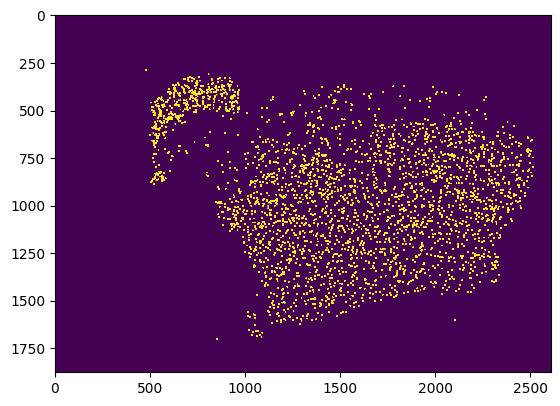

In [112]:
plt.imshow(image_of_index_[::5, ::5], vmax=1)

In [114]:
indices = find_nearest_index_batch(image_of_index_f, index_of_coords, sort=True)
# retain_indices = np.where(image_of_index_f[indices] == index_of_coords)
# indices = indices[retain_indices]

In [118]:
np.all(ind == indices)

True

In [123]:
xx

array([[   0,    0,    0, ...,    0,    0,    0],
       [   1,    1,    1, ...,    1,    1,    1],
       [   2,    2,    2, ...,    2,    2,    2],
       ..., 
       [9383, 9383, 9383, ..., 9383, 9383, 9383],
       [9384, 9384, 9384, ..., 9384, 9384, 9384],
       [9385, 9385, 9385, ..., 9385, 9385, 9385]])

In [122]:
yy, xx = np.meshgrid(np.arange(0, slide.slide_shape_rc[1]), np.arange(0, slide.slide_shape_rc[0]))

In [124]:
yy = yy.flatten()
xx = xx.flatten()

In [91]:
dff = df.iloc[retain_indices]

In [125]:
new_x = yy[indices]
new_y = xx[indices]

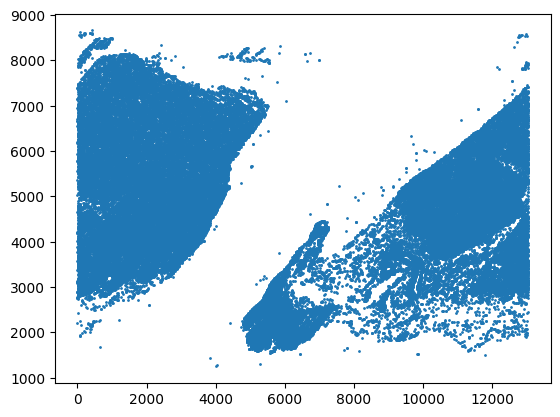

In [126]:
plt.scatter(new_x, new_y, s=1)

In [128]:
x_ = image_of_x_[indices]
y_ = image_of_y_[indices]

In [129]:
new_x

array([5800, 5821, 6778, ..., 4330, 5502, 5502])

In [94]:
dff.insert(dff.columns.get_loc("x_original"), "x", new_x)
dff.insert(dff.columns.get_loc("y_original"), "y", new_y)
dff.to_csv(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/pre2ims.valis/Images/statistics_analysis_to_precodex_registered-from-image.csv")

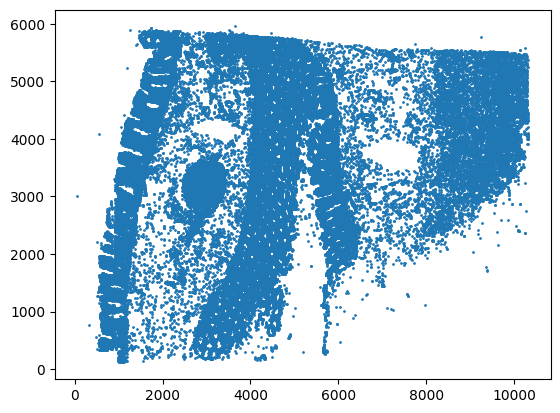

In [78]:
plt.scatter(new_x, new_y, s=1)

In [48]:
indices

array([ 6898664, 20336737, 33549655, ..., 60162143, 54708691, 54708691])

array([       0, 45394645, 45394646, ..., 25897516, 60162143, 54708691])

In [37]:
res_flat[np.searchsorted(res_flat, index_of_coords, side="left", sorter=np.argsort(res_flat)) - 1] 

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [171]:
res_flat.max()

88459.0

In [168]:
res_flat[indices]

0.0

In [162]:
index_of_coords

array([    1,     2,     3, ..., 88458, 88459, 88460])

In [135]:
np.unique(res).shape

(78634,)

In [119]:
yx_image = image[:, :, [1, 2]]
# yx_
# for y_, x_ in zip(y, x):
#     indices = np.argwhere(yx_image == [y_, x_])

In [130]:
yx_image.flatten().reshape(-1, 2

1089738896

In [124]:
np.argwhere(yx_image == [y[0], x[0]])

array([[ 318, 2940,    1],
       [ 506, 2940,    1],
       [ 531, 2940,    1],
       [ 885,  727,    0],
       [ 885, 2940,    0],
       [ 885, 2940,    1],
       [ 885, 3218,    0],
       [ 885, 3292,    0],
       [ 885, 3695,    0],
       [ 885, 3721,    0],
       [ 885, 4474,    0],
       [ 885, 4551,    0],
       [ 955, 2940,    1],
       [ 997, 2940,    1],
       [1108, 2940,    1],
       [2694, 2940,    1],
       [2781, 2940,    1],
       [2928, 2940,    1],
       [3073, 2940,    1],
       [3104, 2940,    1],
       [3482, 2940,    1],
       [3546, 2940,    1],
       [3597, 2940,    1]])

In [105]:
image[:, :, 1].flatten().max()

5953.0

In [106]:
res[:, :, 1].flatten().max()

5953.0

In [96]:
x = res[:, :, 2]
np.where(x == np.max(x)), np.max(x)

((array([3425]), array([10738])), 10328.0)

In [95]:
y = res[:, :, 1]
np.where(y == np.max(y)), np.max(y)

((array([5923]), array([3754])), 5953.0)

In [100]:
res[3754, 10738]

array([ 0.,  0.,  0.,  0.])

In [81]:
slide.slide_shape_rc

array([ 6341, 10741])

In [85]:
for i in range(4):
    np.save(f"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/pre2ims.valis/Images/statistics_analysis_to_precodex_registered-{i}.npy", image[:, :, i])

In [11]:
source_pixel_size = 0.65
is_px = source_pixel_size != 0.65

In [15]:
ref = reg.get_ref_slide()

In [16]:
ref.M

array([[  1.        ,   0.        ,  -5.58205736],
       [  0.        ,   1.        , -59.94662984],
       [  0.        ,   0.        ,   1.        ]])

In [56]:
from skimage import exposure
from image2image_reg.utils.visuals import jzazbz_cmap, create_overlap_img


def draw_overlap_img(img_list, blending="weighted"):
    """Create image showing the overlap of registered images
    blending="weighted"
    blending="light"
    """

    cmap = jzazbz_cmap()
    overlap_img = create_overlap_img(img_list, cmap=cmap, blending=blending)

    overlap_img = exposure.equalize_adapthist(overlap_img)
    overlap_img = exposure.rescale_intensity(
        overlap_img, out_range=(0, 255)
    ).astype(np.uint8)
    return overlap_img

(100, 100) True
(100, 100) True


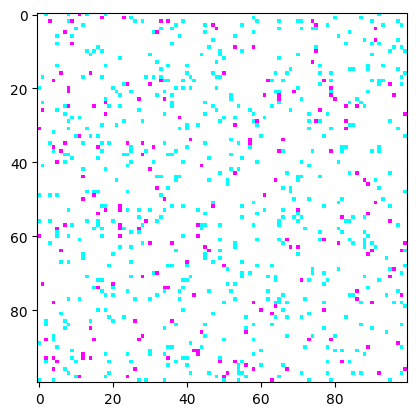

In [224]:
image1 = np.random.rand(100, 100, 3) * 255
image2 = np.random.rand(100, 100, 3) * 255
image3 = np.random.rand(100, 100, 3) * 255
image4 = np.random.rand(100, 100, 3) * 255
res = create_overlap_img([image1, image3]) #, image3, image4])
plt.imshow(res)

In [54]:
from pathlib import Path
import pandas as pd

output_dir = Path(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/tmp")
img_path = Path(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/pre2ims.valis/Images/precodex_to_he_registered.ome.tiff")
csv_path = Path(r"/Users/lgmigas/Documents/_projects_/2024_hickey_kruse2/B009-reg002/pre2ims.valis/Images/statistics_analysis_to_precodex_registered.csv")

In [25]:
img_reader = get_simple_reader(img_path)
csv_reader = get_simple_reader(csv_path)

In [26]:
crop = [3000, 3000]

In [31]:
img = img_reader.get_channel(0, 0)
cropped = img[3000:, 3000:]
np.save(output_dir / "temporary.npy", cropped)

/Users/lgmigas/Documents/GitHub/image2image/venv/lib/python3.9/site-packages/dask/array/core.py:1705: FutureWarning: The `numpy.save` function is not implemented by Dask array. You may want to use the da.map_blocks function or something similar to silence this warning. Your code may stop working in a future release.
  warnings.warn(


In [35]:
df = csv_reader.df

In [58]:
csv_reader.x

array([ 1047.87289606,  3017.99307233,  4090.92169605, ...,  1872.01264807,
        4875.53875803,  4591.05015694])

In [64]:
x = csv_reader.x.copy() - 3000 + 0
y = csv_reader.y.copy() - 3000 + 0
indices = np.where((x >= 0) & (y >= 0))
df = pd.DataFrame.from_dict({"x": x, "y": y})
np.savetxt(output_dir / "temporary.csv", df.values, delimiter=",", fmt="%.4f", header=",".join(df.columns))